# 1. Importing Libraries

In [22]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data 

In [23]:
# create a data path
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 4/04-2023 Instacart Basket Analysis'

In [24]:
# import 'ords_prods_merged' df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merge_group.pkl'))

# 3. Creating Bar Charts

<Axes: >

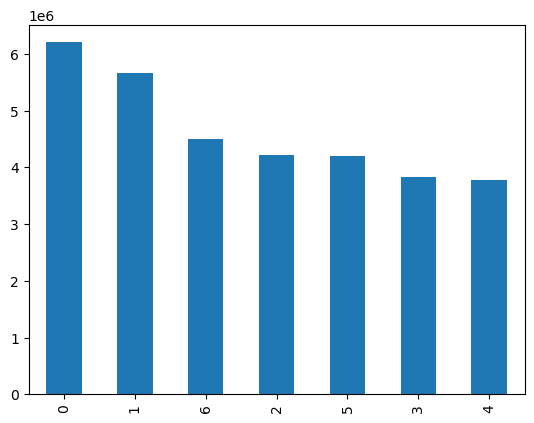

In [25]:
# create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

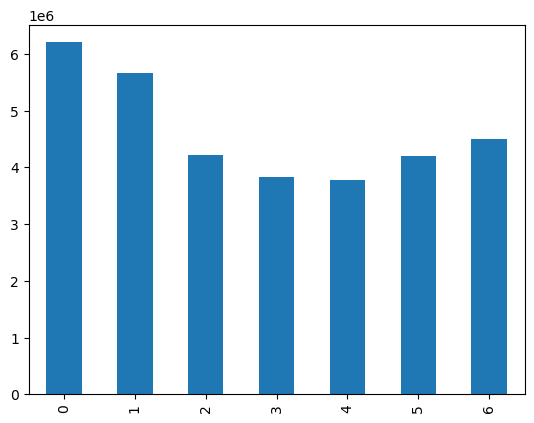

In [26]:
# sort the bar by index using sort_index()
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [27]:
# sort_index() be used when printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<Axes: >

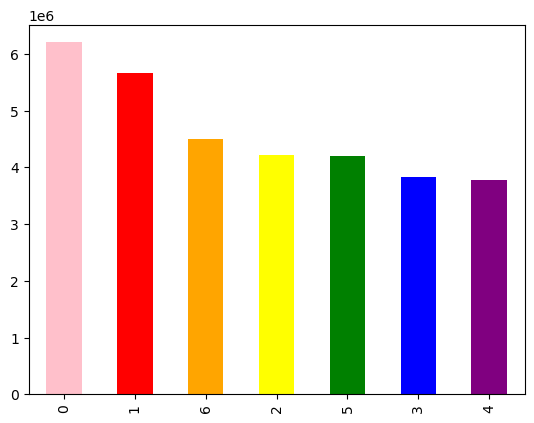

In [28]:
# adding color to the bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['pink','red', 'orange', 'yellow', 'green', 'blue', 'purple'])

# 4. Exporting Charts

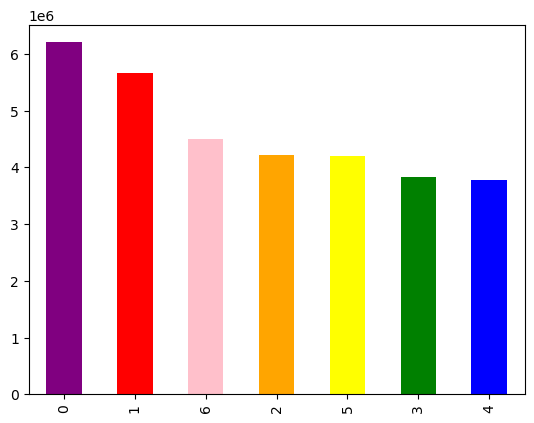

In [29]:
# save the chart in the 'bar' object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [30]:
# export the bar chart outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 5. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

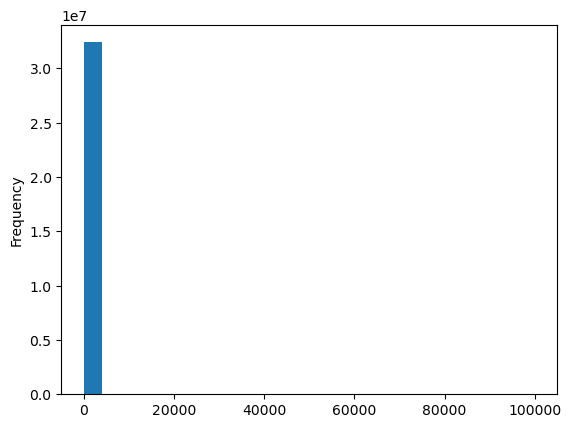

In [31]:
# create a histogram of the “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [32]:
# check the column 'prices'
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

 The max looks odd

In [33]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

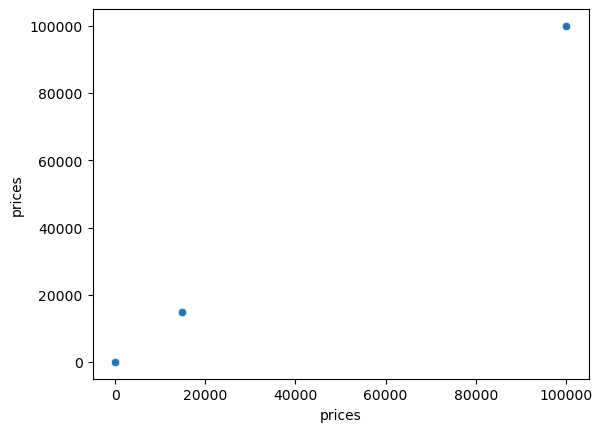

In [34]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [35]:
# check anything above the “normal” price of a supermarket item (> $100)
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_purchased,spending_flag,median_order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regulary busy,Average orders,4,New customer,1154.792308,High spender,12.0,Frequent customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Frequent customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Frequent customer


In [36]:
#  mark them as missing since they don’t make sense in terms of the other values in the column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [37]:
# check whether the replacement was successful by running a max-value check on your “prices” column 
ords_prods_merge['prices'].max()

25.0

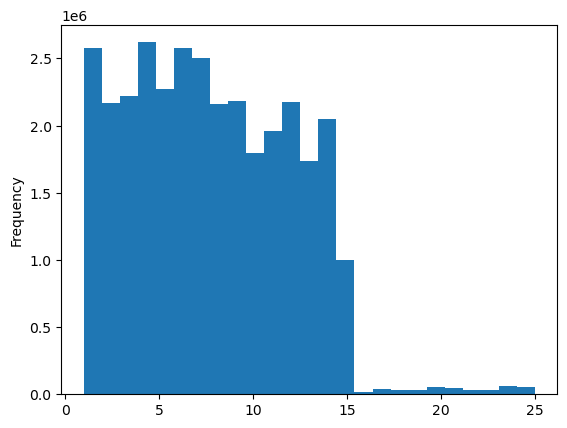

In [39]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

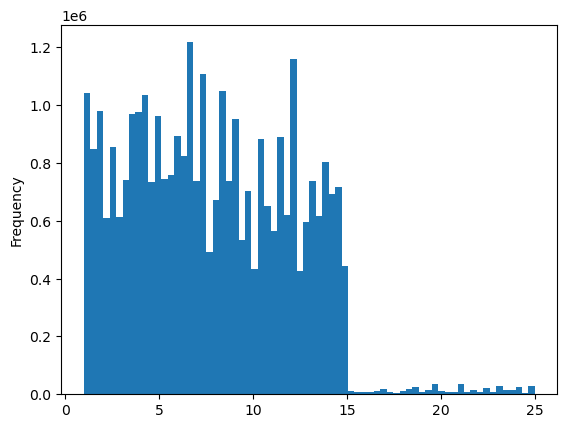

In [40]:
# increase the level of granularity in the histogram
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [41]:
# export the histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 6. Creating Line Charts Using A Sample Subset

###### Sampling Data

In [42]:
# set the seed
np.random.seed(4)

In [43]:
# crate a list called 'dev' to hold True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [44]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [45]:
# store 70% of the sample in the dataframe 'big'
big = ords_prods_merge[dev]

In [46]:
# store 30% of the sample in the dataframe 'small'
small = ords_prods_merge[~dev]

In [48]:
# check the result
len(ords_prods_merge) == len(big) + len(small)

True

In [49]:
# reduce the samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”
df_2 = small[['orders_day_of_week', 'prices']]

###### Creating A Line Chart

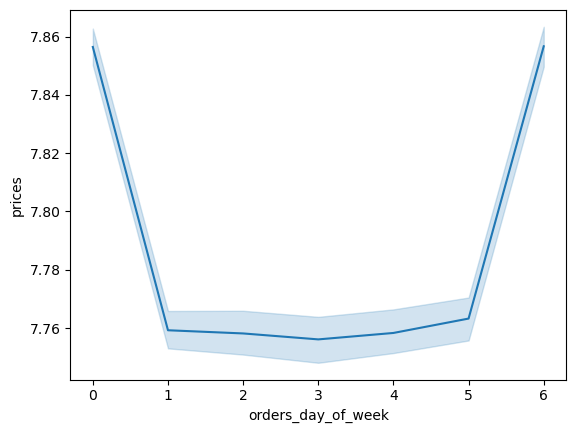

In [50]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

Is the line chart created from the sample 'big' presentative?
--> compare the line chart of the subset with the line chart of the entire dataframe

In [54]:
# export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_prices.png'))